In [2]:
#transfer learning 
#animal dataset


In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [95]:
#preprocessing
train_dir =r"C:\Users\SIDHARTH KUMTHEKAR\Desktop\SEM-7\DL-6\dog_cat\train"
test_dir = r"C:\Users\SIDHARTH KUMTHEKAR\Desktop\SEM-7\DL-6\dog_cat\test"

In [96]:
datagen = ImageDataGenerator(
    rescale = 1./255,
)
train_generator = datagen.flow_from_directory(
    r'C:\Users\SIDHARTH KUMTHEKAR\Desktop\SEM-7\DL-6\dog_cat\train',
    target_size=(64,64),
    batch_size=100,
    class_mode='binary'
)

Found 10422 images belonging to 2 classes.


In [97]:
validation_generator = datagen.flow_from_directory(
    r'C:\Users\SIDHARTH KUMTHEKAR\Desktop\SEM-7\DL-6\dog_cat\test',
    target_size=(64,64),
    batch_size=100,
    class_mode='binary'
)

Found 10254 images belonging to 2 classes.


In [67]:
#import pretrained model 


In [98]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
base_model = tf.keras.applications.MobileNetV2(input_shape=(64,64,3),
                                               include_top=False,
                                               weights='imagenet')

In [99]:
for layer in base_model.layers:
    layer.trainable = False

In [100]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
x_train,y_train = train_generator[0]
x_test,y_test = validation_generator[0]

In [102]:
model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
2/2 [==============================] - 13s 3s/step - loss: 0.6576 - accuracy: 0.7900 - val_loss: 1.3192e-04 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 787ms/step - loss: 0.3896 - accuracy: 0.9700 - val_loss: 4.9164e-05 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 752ms/step - loss: 0.3018 - accuracy: 0.9700 - val_loss: 9.3178e-05 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 754ms/step - loss: 0.2150 - accuracy: 0.9700 - val_loss: 3.0011e-04 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 786ms/step - loss: 0.1952 - accuracy: 0.9700 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 1s 816ms/step - loss: 0.0785 - accuracy: 0.9700 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 1s 786ms/step - loss: 0.0890 - accuracy: 0.9700 - val_loss: 0.0429 - val_accuracy: 0.9900
Epoch 

In [103]:
base_model=tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False,input_shape=(64,64,3))
#freeze al layeres
for layers in base_model.layers:
    layers.trainable=False
    
#unfreeze last 4 layers
for layers in base_model.layers[len(base_model.layers)-2:]: ##imp handling :
    layers.trainable=True

In [104]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)


In [105]:
model=Model(inputs=base_model.input,outputs=predictions)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
2/2 [==============================] - 13s 3s/step - loss: 0.6414 - accuracy: 0.7400 - val_loss: 3.2283e-05 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 757ms/step - loss: 0.2279 - accuracy: 0.9700 - val_loss: 1.0841e-06 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 787ms/step - loss: 0.2289 - accuracy: 0.9700 - val_loss: 2.9957e-07 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 787ms/step - loss: 0.2727 - accuracy: 0.9700 - val_loss: 2.7802e-07 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 1s 787ms/step - loss: 0.1345 - accuracy: 0.9700 - val_loss: 5.5946e-07 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 1s 878ms/step - loss: 0.0630 - accuracy: 0.9700 - val_loss: 1.3188e-06 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 1s 800ms/step - loss: 0.0630 - accuracy: 0.9800 - val_loss: 3.0922e-06 - val_accuracy: 1

In [74]:
labels = list(validation_generator.class_indices.keys())
predicted_value = model.predict(x_test)

4/4 [==============================] - 4s 153ms/step


Preditcted:  0
Actual:  0


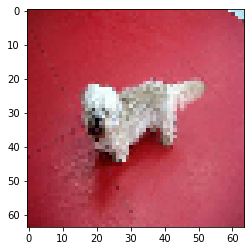

In [116]:
import matplotlib.pyplot as plt
import random

r=random.randint(1,64)

plt.imshow(x_test[r])
print("Preditcted: ",np.argmax(predicted_value[r]))
print("Actual: ", np.argmax(y_test[r]))

In [32]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
   
)

#batch size is number of images in each batch

train_batch_size = 500,
train_generator = train_datagen.flow_from_directory(
    
    train_dir,
    target_size=(32,32),
    batch_size=train_batch_size,
    class_mode = 'categorical'
    

)

test_batch_size=1000,
test_generator = test_datagen.flow_from_directory(
    
    test_dir,
    target_size=(32,32),
    batch_size=test_batch_size,
    class_mode = 'categorical'

)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r"C:\Users\SIDHARTH KUMTHEKAR\Desktop\SEM-7\DL-6\datasets_dog_breed_classification\train"
test_dir = r"C:\Users\SIDHARTH KUMTHEKAR\Desktop\SEM-7\DL-6\datasets_dog_breed_classification\test"

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_batch_size = 500
train_generator = train_datagen.flow_from_directory(
    r"C:/Users/SIDHARTH KUMTHEKAR/Desktop/SEM-7/DL-6/datasets_dog_breed_classification/train",
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)

test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [42]:
import pathlib

In [44]:
#train_dir = r"C:\Users\SIDHARTH KUMTHEKAR\Desktop\SEM-7\DL-6\datasets_dog_breed_classification\train"
#test_dir = r"C:\Users\SIDHARTH KUMTHEKAR\Desktop\SEM-7\DL-6\datasets_dog_breed_classification\test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_batch_size = 500
train_generator = train_datagen.flow_from_directory(
    r"C:/Users/SIDHARTH KUMTHEKAR/Desktop/SEM-7/DL-6/datasets_dog_breed_classification/train",
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)


Found 0 images belonging to 0 classes.
